# Zebrafish Opsin Spectra
#### v1.1 | by M. Zimmermann

This script calculates opsin spectra as described in [Govardovskii et al.](https://www.cambridge.org/core/journals/visual-neuroscience/article/in-search-of-the-visual-pigment-template/A4738E821720092B7F5A233C4AB4962B) (In search of the visual pigment template, 2000).

In [1]:
import os
import math
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Helper(s)
#
import scripts.spectrum as spc

# Set graphics to be plotted in the notebook
#
%matplotlib inline 

# Seaborn plot settings
#
sns.set()

# General definition(s)
#
txtFileNewLineStr = "\r\n"

def setPlotStyle():
    # Presettings for figures
    #
    mpl.rcParams['figure.figsize'] = [10, 5]
    mpl.rc('font', size=10)          
    mpl.rc('axes', titlesize=12)    
    mpl.rc('axes', labelsize=12)    
    mpl.rc('xtick', labelsize=12)   
    mpl.rc('ytick', labelsize=12)   
    mpl.rc('legend', fontsize=12)   
    mpl.rc('figure', titlesize=12) 

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Generate array with wavelengths in the relevant range:

## Setting global parameters
Here we defined the max absorbance for each cone opsin present in the Zebrafish. The following values are taken from 
[Allison et al](https://www.cambridge.org/core/journals/visual-neuroscience/article/visual-pigment-composition-in-zebrafish-evidence-for-a-rhodopsinporphyropsin-interchange-system/D7824490079257A101123EBD593C153C) (Visual pigment composition in zebrafish:Evidence for a rhodopsin–porphyropsin interchange system, 2004)

In [3]:
zebrafish_peak_nm = [361, 411, 482, 565, 503]
zebrafish_opsins  = ["UV-opsin", "S-opsin", "M-opsin", "L-opsin,", "rhodopsin"]

start_nm    = 300
end_nm      = 700
wavelengths = np.arange(start_nm, end_nm, 1)

## Generate template

Following (A1 pigment) templates to desired peak wavelengths: lambdamax [Govardovskii et al.](https://www.cambridge.org/core/journals/visual-neuroscience/article/in-search-of-the-visual-pigment-template/A4738E821720092B7F5A233C4AB4962B) (In search of the visual pigment template, 2000). Itself adapted from the template described by [Lamb et al](https://www.sciencedirect.com/science/article/pii/004269899500114F?via%3Dihub) (Photoreceptor Spectral Sensitivities:Common Shape in the Long-wavelength Region, 1995)

***

#### AlphaBand     $$S\alpha(x) = \frac{1}{exp[A(a-x)] + exp[B(b-x)] + exp[C(c-x)] + D}$$

Where $x$ = $\frac{\lambda max}{\lambda}$

With $a$ the only variable parameter such as $a$ = $0.8795 + 0.0459 * exp^{\frac{(\lambda max -300)^{2}}{11940}}$, and constant parameters (A, B, b, C, c, D) as defined below.

***

#### BetaBand      $$S\beta(\lambda) = A\beta * exp^{-(\frac{\lambda - \lambda m\beta}{b})^{2}}$$

With $A_{\beta}$  the amplitude of the $\beta band$ relative to the $\alpha band$, $\lambda m_{\beta}$ the position of the $\beta peak$ and $b$ a bandwidth parameter


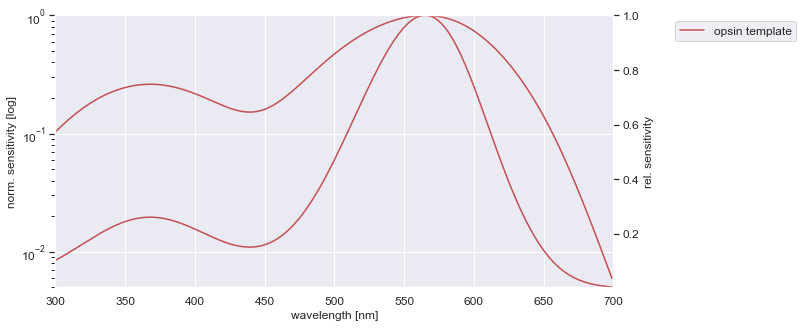

In [4]:
''' 
This part of the code uses the absorbance spectrum fitting template for visual pigment 
defined by Govardoskii et al (In Search of Visual Pigment Template, 2000).                                                                               
'''

def Govardovskii (wvsloc, lambdamax): # This function returns one sensitivity spectrum point y at wavelength = wvs of an opsin  with a peak at lambdamax, wvs - such wavelengths at which the template will be evaluated: 1d-array lambdamax - peak of the sensitivity spectrum'''
   
   wvs = np.asarray(wvsloc)
    
   ## Alpha Band ##
   A = 69.7
   a = 0.8795+0.0459*np.exp(-np.square(lambdamax-300)/11940)
   B = 28
   b = 0.922
   C = -14.9
   c = 1.104
   D = 0.674
   x = lambdamax/wvs
   alphaband = 1/ (np.exp(A*(a-x))+np.exp(B*(b-x))+np.exp(C*(c-x))+D)
   
   ## Beta Band ##
   Ab = 0.26 #Beta value at peak
   b = -40.5+0.195*lambdamax #Beta bandwidth
   mb = 189+0.315*lambdamax #Beta peak
   betaband = Ab * np.exp(-1*((wvs-mb)/b)**2)
    
   return alphaband+betaband

rod = Govardovskii(wavelengths,zebrafish_peak_nm[4])
red = Govardovskii(wavelengths,zebrafish_peak_nm[3])
green = Govardovskii(wavelengths,zebrafish_peak_nm[2])
blue = Govardovskii(wavelengths,zebrafish_peak_nm[1])
uv = Govardovskii(wavelengths,zebrafish_peak_nm[0])

Opsin = np.zeros((len(wavelengths),5))
Opsin = (uv,blue,green,red,rod)


# Plot template
#
setPlotStyle()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
col = ['m','b','g','r','k']                
ax1.semilogy(wavelengths, Opsin[3], color=col[3], label="opsin template")
ax1.set_xlabel("wavelength [nm]")        
ax1.set_ylabel("norm. sensitivity [log]")      
ax1.set_ylim((0.005, 1.0))
ax1.set_xlim((300, 700))
ax2.plot(wavelengths, Opsin[3], color=col[3], label="opsin template")
ax2.set_ylim((0.005, 1.0))
ax2.set_ylabel("rel. sensitivity")      
ax2.legend(bbox_to_anchor=(1.1, 1), loc="upper left")
ax2.grid(False)   

## Generate zebrafish opsin curves

L-, M-, S-, UV- opsin as well as rhodopsin

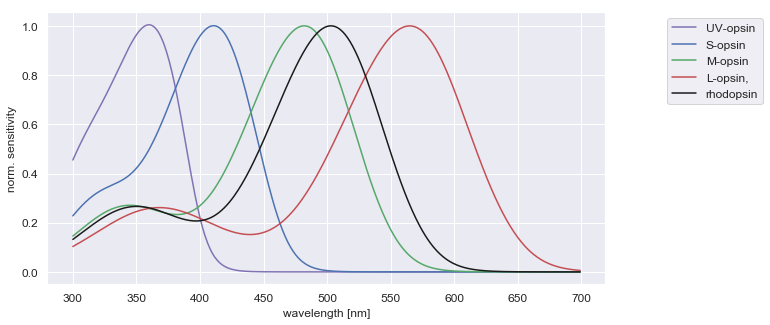

In [5]:
for iP in range (5):
    plt.plot(wavelengths, Opsin[iP], color=col[iP], label=zebrafish_opsins[iP])
plt.gca().set(xlabel="wavelength [nm]", ylabel="norm. sensitivity")     
plt.legend(bbox_to_anchor=(1.1, 1), loc="upper left")

In [36]:
zebrafish_cone_opsin = np.zeros((len(wavelengths),5))
for iW in range (len(wavelengths)):
    zebrafish_cone_opsin[iW] = (Opsin[0][iW],Opsin[1][iW],Opsin[2][iW],Opsin[3][iW],wavelengths[iW])
np.savetxt('zebrafish_cone_opsins.txt',zebrafish_cone_opsin, fmt = '%1.6f')